# 데이터 전처리

## 넘파이로 데이터 준비하기


In [4]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [1]:
import numpy as np

In [2]:
np.column_stack(([1, 2, 3], [4, 5, 6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [5]:
fish_data = np.column_stack((fish_length, fish_weight))

In [6]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [7]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [8]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [9]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [12]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [13]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [14]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [16]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## 수상한 도미 한 마리

In [17]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [18]:
print(kn.predict([[25, 150]]))

[0.]


In [1]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('lentgh')
plt.ylabel('weight')
plt.show()

NameError: name 'train_input' is not defined

In [31]:
distances, indexes = kn.kneighbors([[25, 150]])

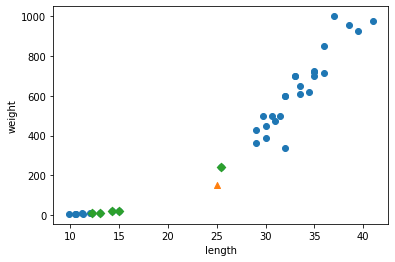

In [26]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [27]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [28]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [32]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


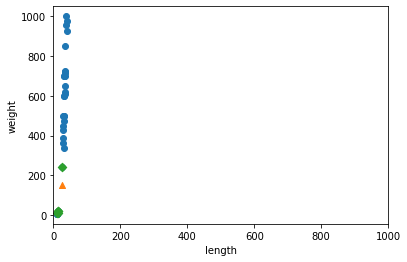

In [33]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [34]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [35]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [36]:
train_scaled = (train_input - mean) / std

## 전처리 데이터로 모델 훈련하기

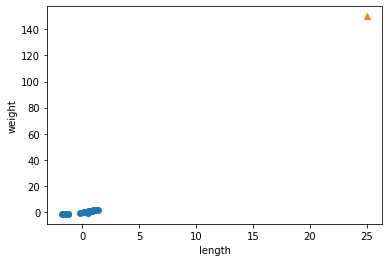

In [37]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^') # 얘는 정규화 안해버렸지 모얌~
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

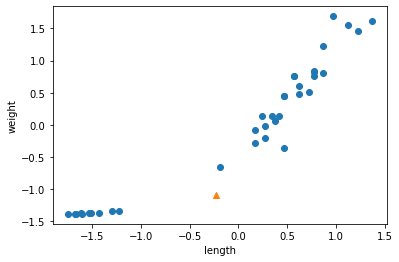

In [38]:
new = ([25, 100] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [39]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [40]:
test_scaled = (test_input - mean) / std

In [41]:
kn.score(test_scaled, test_target)

1.0

In [43]:
print(kn.predict([new]))

[1.]


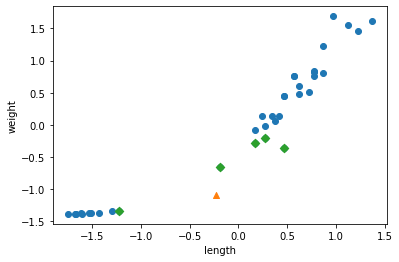

In [46]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 스케일이 다른 특성 처리

- 특성들의 스케일이 다르면 대부분의 머신러닝 알괼즘은 잘 작동하지 않음
- 이에 따라 특성을 표준점수(표준화)로 변환
- 표준 점수 이외에도 특성 스케일 조정법은 많지만 대부분의 경우 표준점수로 충분
- 데이터 전처리 시 주의할 점은 **훈련 세트를 변환한 방식 그대로 테스트 세트를 변환**해야 한다는 것